In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import random
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, GlobalAveragePooling2D
from keras.applications.resnet import ResNet50
from keras import initializers
from keras.optimizers import RMSprop
import time


Using TensorFlow backend.


### Print Dataset Directory

In [2]:
data_dir = os.listdir('../../../train_ds/')
for data in data_dir: 
    print(data)

cremad4896-5.wav
cremad5772-1.wav
tess1191-4.wav
cremad503-5.wav
cremad4190-3.wav
ravdess649-7.wav
cremad864-2.wav
ravdess533-7.wav
cremad205-0.wav
cremad2123-1.wav
cremad5581-4.wav
tess617-5.wav
cremad1081-2.wav
tess1319-1.wav
cremad4916-0.wav
tess1884-2.wav
tess994-3.wav
cremad6612-0.wav
tess118-0.wav
cremad7116-1.wav
cremad2178-0.wav
ravdess481-4.wav
tess1164-4.wav
cremad6652-3.wav
cremad5045-3.wav
tess1221-1.wav
cremad4804-2.wav
ravdess1349-5.wav
tess2653-6.wav
ravdess819-3.wav
cremad1223-1.wav
cremad4846-4.wav
tess625-5.wav
cremad3378-5.wav
cremad3639-5.wav
ravdess844-3.wav
cremad6468-3.wav
cremad3940-1.wav
cremad1890-2.wav
cremad3626-4.wav
tess2677-6.wav
cremad4406-1.wav
tess502-0.wav
cremad6539-5.wav
cremad4591-1.wav
cremad6007-4.wav
tess1786-5.wav
cremad6846-5.wav
cremad2790-3.wav
tess2787-6.wav
cremad5995-1.wav
cremad2751-3.wav
cremad7193-2.wav
tess1406-2.wav
cremad1008-4.wav
cremad2195-2.wav
cremad1725-5.wav
tess404-0.wav
cremad6143-3.wav
cremad3105-4.wav
ravdess1130-6.wav
te

cremad1686-1.wav
tess1289-1.wav
savee119-0.wav
cremad6581-2.wav
cremad3541-2.wav
cremad7160-1.wav
savee442-1.wav
cremad5421-3.wav
tess354-3.wav
cremad3159-5.wav
cremad2621-4.wav
cremad3361-1.wav
tess909-3.wav
cremad4656-0.wav
cremad170-1.wav
cremad10-0.wav
tess1416-2.wav
cremad6181-5.wav
cremad7418-0.wav
ravdess200-0.wav
cremad2299-3.wav
cremad5404-1.wav
tess2468-4.wav
tess1418-2.wav
tess2795-6.wav
cremad7333-3.wav
cremad2224-5.wav
tess190-0.wav
ravdess1387-5.wav
cremad5282-2.wav
cremad2394-1.wav
cremad849-5.wav
cremad5459-4.wav
cremad582-0.wav
tess1108-4.wav
cremad1115-1.wav
ravdess179-7.wav
tess1101-4.wav
cremad754-0.wav
cremad186-4.wav
tess351-3.wav
tess629-5.wav
tess764-5.wav
tess1508-2.wav
cremad4696-5.wav
cremad1212-3.wav
cremad614-1.wav
cremad1477-5.wav
tess443-0.wav
cremad6443-1.wav
tess105-0.wav
ravdess329-7.wav
cremad1330-0.wav
cremad117-2.wav
cremad1818-5.wav
cremad3908-4.wav
cremad5767-5.wav
tess875-3.wav
cremad1726-4.wav
cremad3658-2.wav
cremad3760-5.wav
cremad5750-4.wav
c

tess2265-1.wav
cremad74-5.wav
cremad3590-1.wav
cremad2184-1.wav
cremad917-1.wav
cremad5123-3.wav
savee325-4.wav
tess2545-4.wav
cremad5372-1.wav
tess1133-4.wav
cremad7241-0.wav
tess2035-6.wav
tess871-3.wav
tess2084-6.wav
savee113-6.wav
ravdess1374-4.wav
cremad5870-5.wav
ravdess1404-7.wav
cremad2591-1.wav
cremad4602-5.wav
cremad2044-0.wav
cremad428-3.wav
tess1807-2.wav
tess1024-4.wav
ravdess785-4.wav
cremad4214-5.wav
cremad2801-4.wav
tess863-3.wav
tess752-5.wav
ravdess1110-3.wav
cremad1450-2.wav
cremad5249-0.wav
ravdess1159-7.wav
tess537-0.wav
tess638-5.wav
tess2393-1.wav
cremad5718-2.wav
cremad2853-3.wav
cremad5221-1.wav
cremad2639-0.wav
cremad4487-1.wav
cremad5584-0.wav
cremad7102-2.wav
cremad5435-1.wav
tess2547-4.wav
cremad7073-3.wav
cremad4556-3.wav
tess2750-6.wav
cremad2649-5.wav
tess1149-4.wav
tess1847-2.wav
tess1567-2.wav
tess336-3.wav
cremad275-3.wav
tess503-0.wav
tess1885-2.wav
cremad6565-1.wav
cremad3106-2.wav
cremad680-2.wav
tess1107-4.wav
cremad4743-5.wav
cremad5966-0.wav
cre

### Import Dataset

In [3]:
data = pd.DataFrame(columns=['path', 'label'])

cnt = 0
for file in data_dir:
    nm = file.split('.')[0].split('-')
    path = '../../../train_ds/' + file
    label = int(nm[1])

    data.loc[cnt] = [path, label]
    cnt += 1

data.head()

,path,label
0,../../../train_ds/cremad4896-5.wav,5
1,../../../train_ds/cremad5772-1.wav,1
2,../../../train_ds/tess1191-4.wav,4
3,../../../train_ds/cremad503-5.wav,5
4,../../../train_ds/cremad4190-3.wav,3



### Testing imported Data


In [4]:
filename = data.path[3]
print (filename)

samples, sample_rate = librosa.load(filename)

../../../train_ds/cremad503-5.wav


In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

### Plotting raw Wave Form and Spectrogram

Text(0.5, 0, 'Seconds')

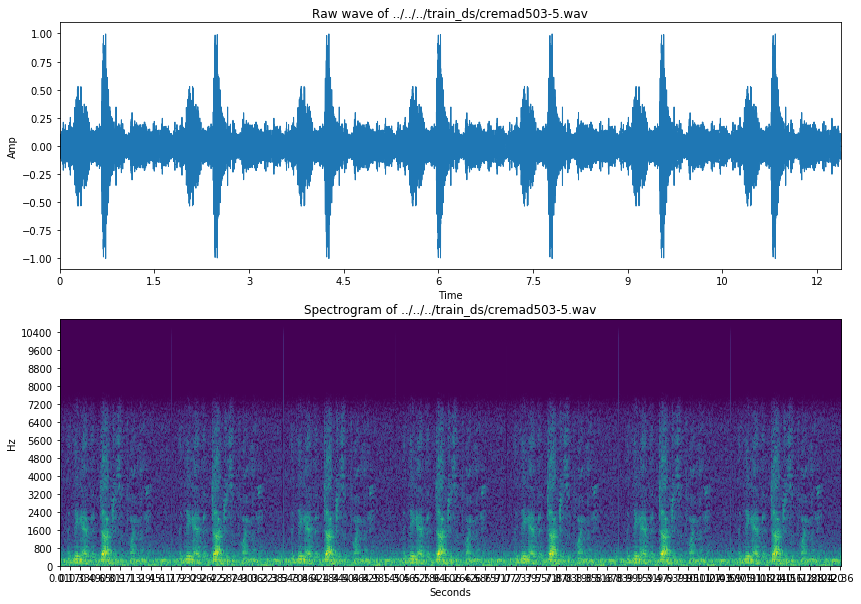

In [6]:
# Plotting Wave Form and Spectrogram

freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amp')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Hz')
ax2.set_xlabel('Seconds')

### Cepstral Mean Normalization

In [7]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)

spectrogram = (spectrogram - mean) / std

### Plotting Mel Power Spectrogram

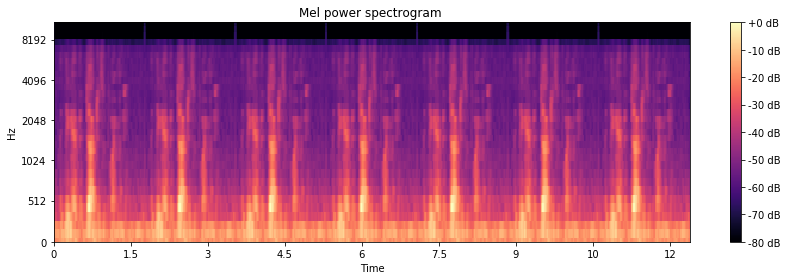

In [8]:
mps = librosa.feature.melspectrogram(samples,
                                     sr=sample_rate,
                                     n_mels=32)

# Convert to log scale
log_mps = librosa.power_to_db(mps, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_mps, sr=sample_rate,
                         x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

### Plotting MFCC

(32, 534)


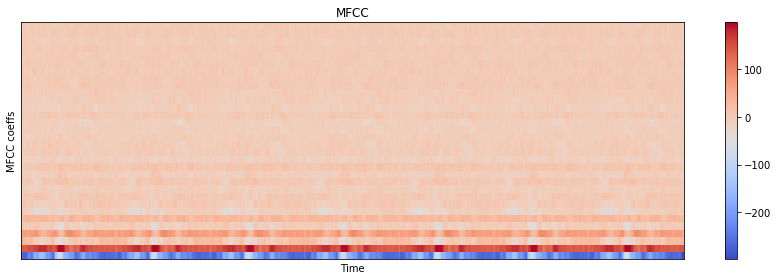

In [9]:
mfcc = librosa.feature.mfcc(y=samples, n_mfcc=32)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

print(mfcc.shape)

In [10]:
data2 = data.copy()
data2 = data2.sample(frac=1)
data2.head()

,path,label
8124,../../../train_ds/cremad4288-5.wav,5
702,../../../train_ds/ravdess252-1.wav,1
9029,../../../train_ds/cremad3039-0.wav,0
6533,../../../train_ds/tess2128-6.wav,6
6561,../../../train_ds/ravdess583-1.wav,1


### Convert dataset paths into mfccs

In [11]:
data = pd.DataFrame(columns=['feature', 'label'])

for i in tqdm(range(int(len(data2) * 0.2))):
    X, sample_rate = librosa.load(data2.path[i], duration=3, res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=32)
    rest = np.zeros((32, 261 - mfcc.shape[1]))
    mfcc = np.hstack((mfcc, rest))
    mfccs = np.stack((mfcc,) * 3, axis=-1)
    data.loc[i] = [mfccs, data2.label[i]]

data.head()

100%|██████████| 2432/2432 [01:07<00:00, 35.86it/s]


,feature,label
0,"[[[-176.59031677246094, -176.59031677246094, -...",5
1,"[[[-146.3686065673828, -146.3686065673828, -14...",1
2,"[[[-416.7056884765625, -416.7056884765625, -41...",4
3,"[[[-268.1962585449219, -268.1962585449219, -26...",5
4,"[[[-321.4937744140625, -321.4937744140625, -32...",3


### Split Test set before augmentation

In [12]:
X_test = data['feature'].values.tolist()
X_test = np.reshape(X_test, (int(len(data2) * 0.2), 32, 261, 3))
y_test = data.label
lb = LabelEncoder()
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

### Define Data Augmentation Methods

In [13]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

def noise(data):
    """
    Adding White Noise.
    """
    noise_amp = 0.03*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-8, high = 8)*1000)
    return np.roll(data, s_range)
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 1
    pitch_change =  pitch_pm * 1.08 *(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=0.3,high=1.3)
    return (data * dyn_change)


### Save Augmented Data for testing

In [14]:
X, sample_rate = librosa.load(data2.path[0])
noise_sample = noise(X)
librosa.output.write_wav('noise_sample.wav', noise_sample, sample_rate)
shift_sample = shift(X)
librosa.output.write_wav('shift_sample.wav', shift_sample, sample_rate)
pitch_sample = pitch(X, sample_rate)
librosa.output.write_wav('pitch_sample.wav', pitch_sample, sample_rate)
dyn_change_sample = dyn_change(X)
librosa.output.write_wav('dyn_change_sample.wav', dyn_change_sample, sample_rate)

### Increase Train Set by using Data Augmentation

In [15]:
def rnd_aug(audio_wav):
    perc = np.random.rand()
    if perc < 0.25:
        audio_wav = noise(audio_wav)
    elif perc < 0.5:
        audio_wav = shift(audio_wav)
    elif perc < 0.75:
        audio_wav = pitch(audio_wav, 44100)
    elif perc < 1:
        audio_wav = dyn_change(audio_wav)
    return audio_wav

In [16]:
def batch_generator(audio_wav_paths, labels, batch_size, istraining):
    lb = LabelEncoder()
    while True:
        batch_mfcc = []
        batch_label = []
        for i in range(batch_size):
            if istraining:
                rnd_idx = random.randint(int(len(audio_wav_paths) * 0.2),
                                         int(len(audio_wav_paths) * 0.8))
                X, sample_rate = librosa.load(data2.path[rnd_idx], duration=3, res_type='kaiser_fast')
                label = data2.label[rnd_idx]
                aug_audio_wav = rnd_aug(X)
            else:
                rnd_idx = random.randint(int(len(audio_wav_paths) * 0.8),
                                         int(len(audio_wav_paths) - 1))
                X, sample_rate = librosa.load(data2.path[rnd_idx], duration=3, res_type='kaiser_fast')
                label = data2.label[rnd_idx]
            mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=32)
            rest = np.zeros((32, 261 - mfcc.shape[1]))
            mfcc = np.hstack((mfcc, rest))
            mfccs = np.stack((mfcc,) * 3, axis=-1)
            batch_mfcc.append(mfccs)
            batch_label.append(np_utils.to_categorical(label, 8))
        yield(np.asarray(batch_mfcc), np.asarray(batch_label))

### Set up Keras util functions

In [17]:
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

### Define Keras Model

In [18]:
model = keras.models.Sequential([
    keras.applications.ResNet152V2(include_top=False,
             weights = 'imagenet',
             input_tensor = None,
             input_shape = (32, 261, 3),
             pooling = None,
             classes = 8),
    keras.layers.Flatten(),
    Dense(8, activation='softmax')
])

234553344/234545216 [==============================] - 163s 1us/step


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train Model

In [20]:
hist = model.fit_generator(batch_generator(data2.path, data2.label, 20, 1),
                           steps_per_epoch=30,
                           epochs=40,
                           validation_data=batch_generator(data2.path, data2.label, 20, 0),
                           validation_steps=20,
                           verbose=1,
                           shuffle=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
30/30 [==============================] - 80s 3s/step - loss: 2.9679 - accuracy: 0.1750 - val_loss: 108665976.0000 - val_accuracy: 0.1375
Epoch 2/40
30/30 [==============================] - 78s 3s/step - loss: 2.6630 - accuracy: 0.1750 - val_loss: 62807284.0000 - val_accuracy: 0.1200
Epoch 3/40
30/30 [==============================] - 77s 3s/step - loss: 2.5510 - accuracy: 0.1950 - val_loss: 37181.6641 - val_accuracy: 0.1150
Epoch 4/40
30/30 [==============================] - 77s 3s/step - loss: 3.2054 - accuracy: 0.2000 - val_loss: 1018423.9375 - val_accuracy: 0.1525
Epoch 5/40
30/30 [==============================] - 78s 3s/step - loss: 2.8851 - accuracy: 0.1933 - val_loss: 2.7097 - val_accuracy: 0.1800
Epoch 6/40
30/30 [==============================] - 77s 3s/step - loss: 2.9112 - accuracy: 0.2417 - val_loss: 28823.4375 - val_accuracy: 0.1975
Epoch 7/40
30/30 [==============================] - 76s

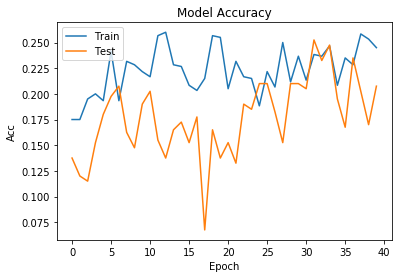

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
model.save('tl_xception_model28.h5')

### Test

In [23]:
results = model.evaluate(X_test, y_test)

76/76 [==============================] - 30s 392ms/step - loss: 3.8744 - accuracy: 0.1805


In [24]:
print('test loss, test acc:', results)

test loss, test acc: [3.874398946762085, 0.18050986528396606]
